In [54]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import practicalSPARQL

In [55]:
path_to_xlsx = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_with_part_type.xlsx'

In [56]:
df = pd.read_excel(path_to_xlsx)

In [57]:
path_to_xlsx1 = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_all_ck_ucks.xlsx'

In [58]:
df1 = pd.read_excel(path_to_xlsx1)

In [59]:
# Step 1: Group by 'images' in df1 and aggregate the UCK values into lists
uck_map = df1.groupby('images')['uck'].apply(list).to_dict()

# Step 2: Map the UCK values to the 'images' column in df
df['UCK'] = df['images'].map(uck_map)

In [60]:
# Step 1: Split the keywords into lists
df['keyword_list'] = df['keywords'].apply(lambda x: x.split(';'))

# Step 2: Check if "CK_Right and Oblique Sphere" is in the keyword lists
righn_and_oblique_spheres_images = df[df['keyword_list'].apply(lambda x: 'CK_Right and Oblique Sphere' in x)]

# Optionally drop the 'keyword_list' column if it's no longer needed
righn_and_oblique_spheres_images = righn_and_oblique_spheres_images.drop(columns=['keyword_list'])

In [61]:
righn_and_oblique_spheres_images

,images,keywords,cluster_name,authors,publishers,printers,place,year,bid,book,part_or_adaption,pagenum,bb,part_type,UCK
25,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;CK_Right and Oblique Sph...,SIL_00014,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1486,1616,http://sphaera.mpiwg-berlin.mpg.de/id/item/c14...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,7,"xywh=152,549,522,506",100,"[Astronomy, SK_1.2 Sphere Divided, CK_Right an..."
37,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_3.6 Right Ascensions;CK_Right and Oblique S...,SIL_02193,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1486,1616,http://sphaera.mpiwg-berlin.mpg.de/id/item/c14...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,36,"xywh=369,186,500,506",100,"[Astronomy, DISCIPLINES, Geocentric Cosmology,..."
77,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;SK_2.11 The Horizon;Per_...,SIL_01971,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,14,"xywh=1222,1127,391,410",adaption_100,"[Astronomy, Subdivisions of the Cosmos, DISCIP..."
78,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;SK_2.12 Elevation of the...,SIL_01641,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,15,"xywh=2945,272,385,400",adaption_100,"[Astronomy, DISCIPLINES, DISCIPLINES, Geocentr..."
92,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_2.12 Elevation of the Pole;CK_Horizon;CK_Ri...,SIL_01158,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,35,"xywh=982,856,769,773",adaption_100,"[Subdivisions of the Cosmos, Geocentric Cosmol..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21081,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;CK_Right and Oblique Sph...,SIL_03536,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,29,"xywh=748,214,515,508",adaption_100,"[Astronomy, DISCIPLINES, Geocentric Cosmology,..."
21082,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;CK_Right and Oblique Sph...,SIL_01496,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,29,"xywh=180,205,547,519",adaption_100,"[Astronomy, DISCIPLINES, DISCIPLINES, Geocentr..."
21159,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_2.11 The Horizon;CK_Horizon;CK_Right and Ob...,SIL_03692,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,321,"xywh=180,1527,627,608",influenced_100,"[DISCIPLINES, Geocentric Cosmology, Subdivisio..."
21160,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Horizon;CK_Right and Oblique Sphere;MVK_Pic...,SIL_01420,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,322,"xywh=489,273,544,577",influenced_100,"[Geocentric Cosmology, DISCIPLINES, Subdivisio..."


In [64]:
# Step 1: Get the unique values of 'cluster_name'
unique_cluster_names = righn_and_oblique_spheres_images['cluster_name'].unique()

# Step 2: Convert the unique values into a DataFrame
unique_cluster_names_df = pd.DataFrame(unique_cluster_names, columns=['unique_cluster_name'])

In [65]:
path_to_xlsx2 = 'C:\\Users\\nogas\\Image_data\\unique_cluster_names.xlsx'

In [66]:
df2 = pd.read_excel(path_to_xlsx2)

In [67]:
# Step 1: Merge df and df2 on the 'cluster_name' column
merged_df = pd.merge(df, df2, on='cluster_name')

In [68]:
merged_df

,images,keywords,cluster_name,authors,publishers,printers,place,year,bid,book,...,bb,part_type,UCK,keyword_list,line/ color blocks,3D/2D,figurative globe,human figure,more than one horizon,Unnamed: 6
0,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;CK_Right and Oblique Sph...,SIL_00014,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1486,1616,http://sphaera.mpiwg-berlin.mpg.de/id/item/c14...,...,"xywh=152,549,522,506",100,"[Astronomy, SK_1.2 Sphere Divided, CK_Right an...","[SK_1.2 Sphere Divided, CK_Right and Oblique S...",line,2D,no,no,no,NaN
1,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_3.6 Right Ascensions;CK_Right and Oblique S...,SIL_02193,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1486,1616,http://sphaera.mpiwg-berlin.mpg.de/id/item/c14...,...,"xywh=369,186,500,506",100,"[Astronomy, DISCIPLINES, Geocentric Cosmology,...","[SK_3.6 Right Ascensions, CK_Right and Oblique...",line,2D,no,no,no,NaN
2,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;SK_2.11 The Horizon;Per_...,SIL_01971,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,...,"xywh=1222,1127,391,410",adaption_100,"[Astronomy, Subdivisions of the Cosmos, DISCIP...","[SK_1.2 Sphere Divided, SK_2.11 The Horizon, P...",line,2D,no,no,no,NaN
3,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;SK_2.12 Elevation of the...,SIL_01641,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,...,"xywh=2945,272,385,400",adaption_100,"[Astronomy, DISCIPLINES, DISCIPLINES, Geocentr...","[SK_1.2 Sphere Divided, SK_2.12 Elevation of t...",line,2D,no,no,no,NaN
4,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_2.12 Elevation of the Pole;CK_Horizon;CK_Ri...,SIL_01158,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,...,"xywh=982,856,769,773",adaption_100,"[Subdivisions of the Cosmos, Geocentric Cosmol...","[SK_2.12 Elevation of the Pole, CK_Horizon, CK...",line,2D,no,no,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;CK_Right and Oblique Sph...,SIL_03536,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,...,"xywh=748,214,515,508",adaption_100,"[Astronomy, DISCIPLINES, Geocentric Cosmology,...","[SK_1.2 Sphere Divided, CK_Right and Oblique S...",color,2D,no,no,no,NaN
687,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.2 Sphere Divided;CK_Right and Oblique Sph...,SIL_01496,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,...,"xywh=180,205,547,519",adaption_100,"[Astronomy, DISCIPLINES, DISCIPLINES, Geocentr...","[SK_1.2 Sphere Divided, CK_Right and Oblique S...",color,2D,no,no,no,NaN
688,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_2.11 The Horizon;CK_Horizon;CK_Right and Ob...,SIL_03692,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,...,"xywh=180,1527,627,608",influenced_100,"[DISCIPLINES, Geocentric Cosmology, Subdivisio...","[SK_2.11 The Horizon, CK_Horizon, CK_Right and...",line,3D,no,no,no,NaN
689,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Horizon;CK_Right and Oblique Sphere;MVK_Pic...,SIL_01420,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,...,"xywh=489,273,544,577",influenced_100,"[Geocentri

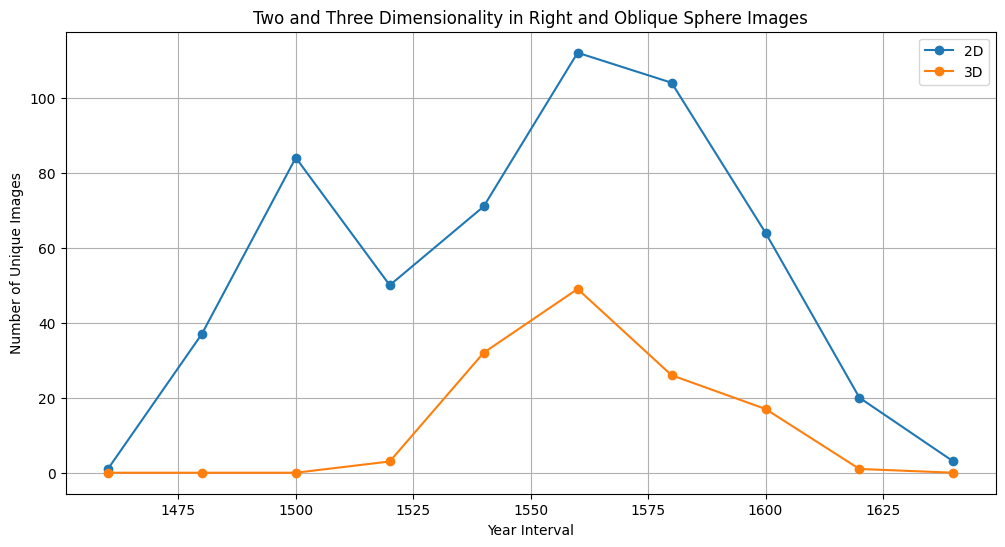

In [77]:
# Step 2: Create a new column for the twenty-year intervals
merged_df['interval'] = merged_df['year'] // 20 * 20

# Step 3: Group by the twenty-year intervals and the 3D/2D column
grouped = merged_df.groupby(['interval', '3D/2D'])['images'].nunique().unstack().fillna(0)

# Step 4: Plot the results using a line graph
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped['2D'], marker='o', label='2D')
plt.plot(grouped.index, grouped['3D'], marker='o', label='3D')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.title('Two and Three Dimensionality in Right and Oblique Sphere Images')
plt.legend()
plt.grid(True)
plt.show()

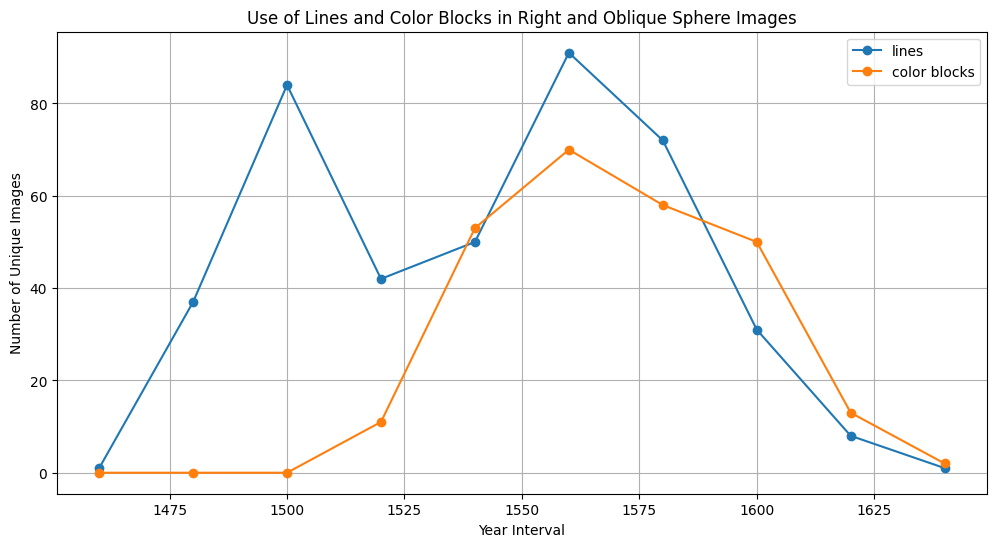

In [78]:
# Step 3: Group by the twenty-year intervals and the 3D/2D column
grouped = merged_df.groupby(['interval', 'line/ color blocks'])['images'].nunique().unstack().fillna(0)

# Step 4: Plot the results using a line graph
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped['line'], marker='o', label='lines')
plt.plot(grouped.index, grouped['color'], marker='o', label='color blocks')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.title('Use of Lines and Color Blocks in Right and Oblique Sphere Images')
plt.legend()
plt.grid(True)
plt.show()

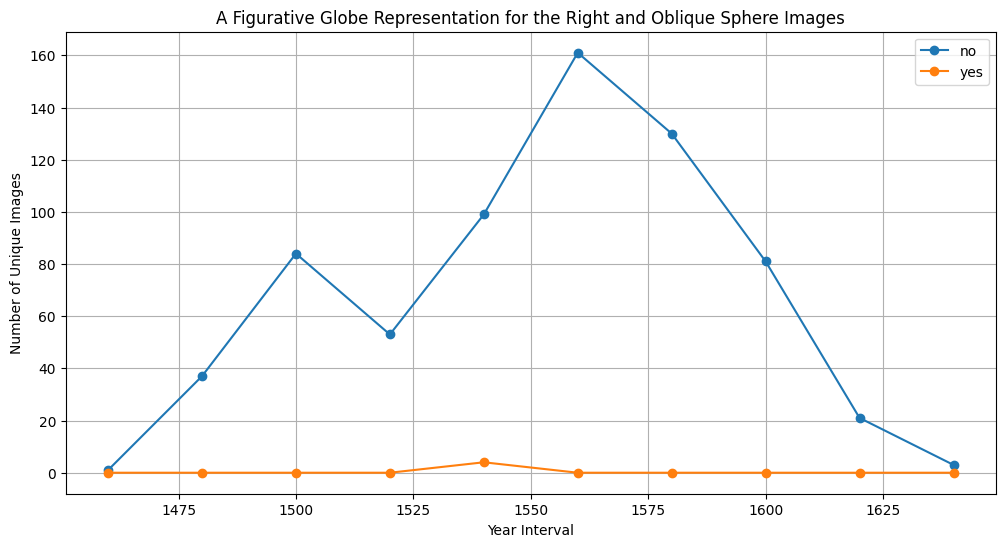

In [80]:
# Step 3: Group by the twenty-year intervals and the 3D/2D column
grouped = merged_df.groupby(['interval', 'figurative globe'])['images'].nunique().unstack().fillna(0)

# Step 4: Plot the results using a line graph
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped['no'], marker='o', label='no')
plt.plot(grouped.index, grouped['yes'], marker='o', label='yes')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.title('A Figurative Globe Representation for the Right and Oblique Sphere Images')
plt.legend()
plt.grid(True)
plt.show()

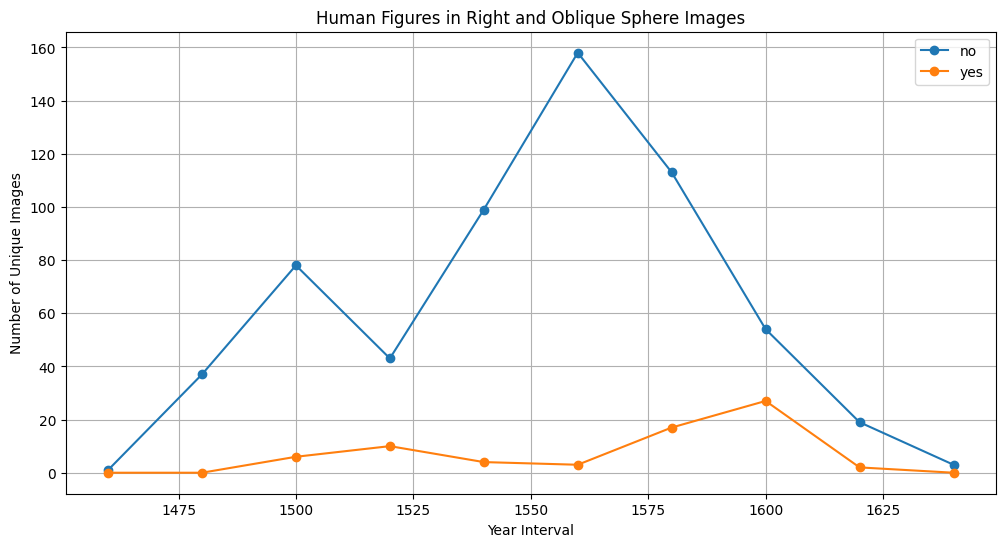

In [81]:
# Step 3: Group by the twenty-year intervals and the 3D/2D column
grouped = merged_df.groupby(['interval', 'human figure '])['images'].nunique().unstack().fillna(0)

# Step 4: Plot the results using a line graph
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped['no'], marker='o', label='no')
plt.plot(grouped.index, grouped['yes'], marker='o', label='yes')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.title('Human Figures in Right and Oblique Sphere Images')
plt.legend()
plt.grid(True)
plt.show()

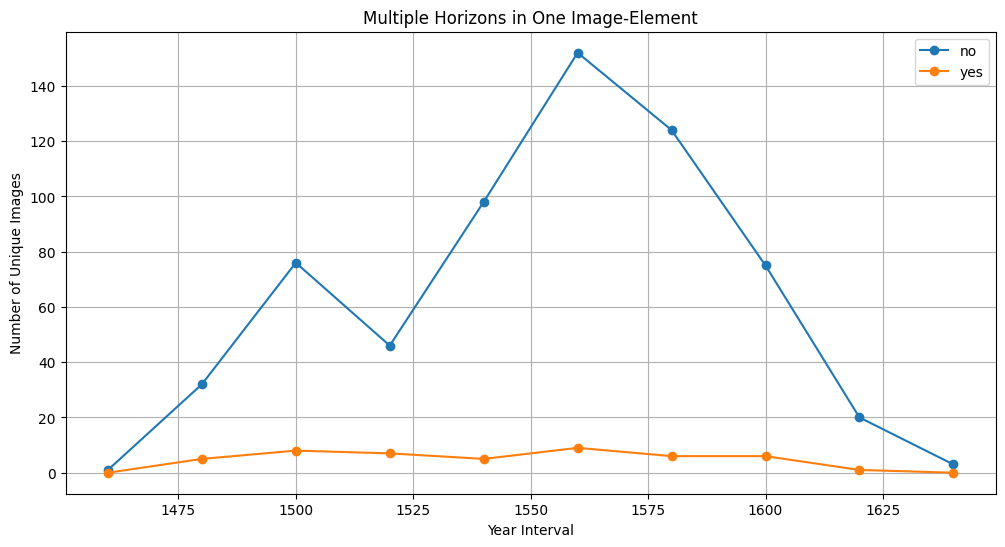

In [82]:
# Step 3: Group by the twenty-year intervals and the 3D/2D column
grouped = merged_df.groupby(['interval', 'more than one horizon'])['images'].nunique().unstack().fillna(0)

# Step 4: Plot the results using a line graph
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped['no'], marker='o', label='no')
plt.plot(grouped.index, grouped['yes'], marker='o', label='yes')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.title('Multiple Horizons in One Image-Element')
plt.legend()
plt.grid(True)
plt.show()